In [1040]:
using CSV, DataFrames, Plots
data = CSV.read("Mumby_Hastings_sim_data.csv",DataFrame)
data = data[:,2:end]
training_data = data[1:3:(end-20),:]
test_data = data[(end-20):3:end,:]
data[1:6,:]
X = DataFrame(t = data.t, series = data.series, X = zeros(length(data.t)))
X[1:6,:]

Row,t,series,X
,Int64,Int64,Float64
1,1,1,0.0
2,2,1,0.0
3,3,1,0.0
4,4,1,0.0
5,5,1,0.0
6,6,1,0.0


In [1041]:
include("../src/UniversalDiffEq.jl")

Main.UniversalDiffEq

In [1042]:
using Lux
dims_in = 2
hidden_units = 10
nonlinearity = tanh
dims_out = 2
NN = Lux.Chain(Lux.Dense(dims_in,hidden_units,nonlinearity),Lux.Dense(hidden_units,dims_out))

# initialize parameters 
using Random
rng = Random.default_rng() 
NNparameters, NNstates = Lux.setup(rng,NN) 

function derivs!(du,u,i,covariates,p,t)
    d, states = NN(u,p.NN, NNstates) # NNstates are
    du.= d .+ beta .* covariates
end

init_parameters = (NN = NNparameters,r = 1.0,m=0.5,theta=0.5, beta = [0; 0])
nothing

In [1043]:
model = UniversalDiffEq.MultiCustomDerivatives(training_data,X,derivs!,init_parameters;proc_weight=10.0,obs_weight=1.0)
nothing

In [1044]:
model.loss_function(model.parameters)

0.3864410995776705

In [1045]:
UniversalDiffEq.gradient_decent!(model,verbos = true,maxiter=150,step_size = 0.1) 
UniversalDiffEq.gradient_decent!(model,verbos = true,maxiter=150,step_size = 0.05) 
UniversalDiffEq.gradient_decent!(model,verbos = true,maxiter=150,step_size = 0.01) 

0.386 1.439 0.315 0.212 0.206 0.166 0.099 0.051 0.038 0.044 0.072 0.079 0.056 0.043 0.035 0.031 0.03 0.033 0.042 0.039 0.025 0.017 0.017 0.019 0.018 0.016 0.013 0.011 0.009 0.007 0.006 0.008 0.009 0.01 0.008 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.005 0.004 0.004 0.003 0.004 0.004 0.004 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.362 0.013 0.184 0.148 0.072 0.063 0.089 0.093 0.065 0.034 0.031 0.049 0.051 0.028 0.016 

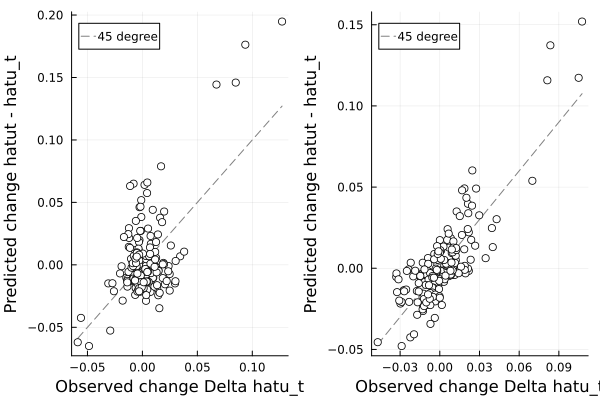

In [1046]:
UniversalDiffEq.plot_predictions(model)

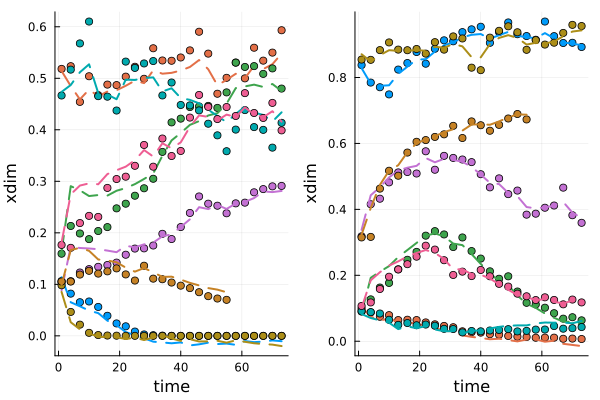

In [1047]:
UniversalDiffEq.plot_state_estiamtes(model)

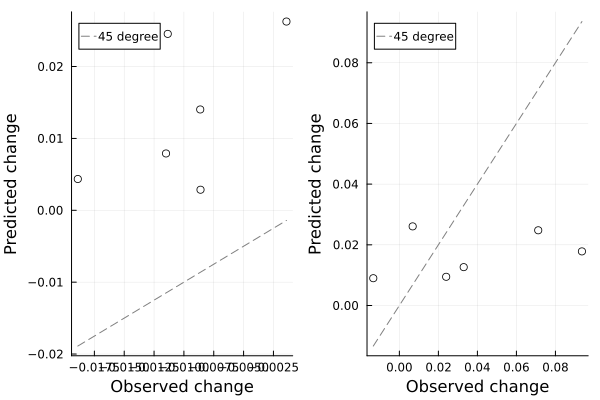

In [1048]:
UniversalDiffEq.plot_predictions(model, test_data)

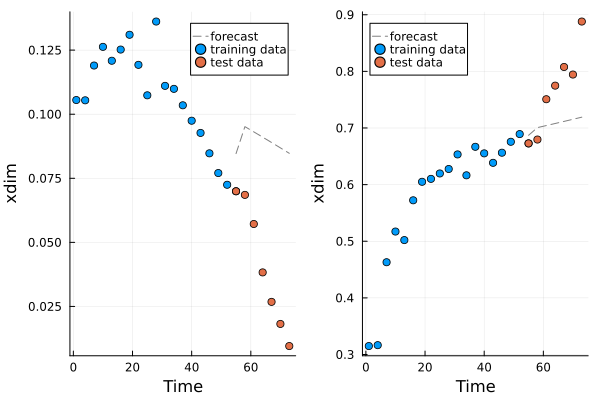

In [1049]:
UniversalDiffEq.plot_forecast(model, test_data)

In [1050]:
using Lux
dims_in = 2
hidden_units = 10
nonlinearity = tanh
dims_out = 2
NN = Lux.Chain(Lux.Dense(dims_in,hidden_units,nonlinearity),Lux.Dense(hidden_units,dims_out))

# initialize parameters 
using Random
rng = Random.default_rng() 
NNparameters, NNstates = Lux.setup(rng,NN) 

function derivs!(du,u,i,p,t)
    d, states = NN(u,p.NN, NNstates) # NNstates are
    du.= d
end

init_parameters = (NN = NNparameters,)
nothing

In [1051]:
model = UniversalDiffEq.MultiCustomDerivatives(training_data,derivs!,init_parameters;proc_weight=10.0,obs_weight=1.0)
nothing

In [1052]:
UniversalDiffEq.gradient_decent!(model,verbos = true,maxiter=150,step_size = 0.1) 
UniversalDiffEq.gradient_decent!(model,verbos = true,maxiter=150,step_size = 0.05) 
UniversalDiffEq.gradient_decent!(model,verbos = true,maxiter=150,step_size = 0.01) 

0.386 1.419 0.218 0.237 0.225 0.197 0.169 0.147 0.147 0.146 0.141 0.141 0.126 0.13 0.12 0.125 0.116 0.115 0.102 0.1 0.091 0.094 0.09 0.09 0.09 0.085 0.087 0.083 0.081 0.083 0.081 0.08 0.079 0.098 0.104 0.154 0.07 0.228 0.138 0.228 0.141 0.093 0.173 0.142 0.084 0.102 0.128 0.118 0.088 0.082 0.105 0.11 0.089 0.082 0.092 0.098 0.091 0.08 0.079 0.087 0.089 0.082 0.078 0.08 0.084 0.081 0.076 0.075 0.078 0.078 0.074 0.073 0.074 0.074 0.071 0.069 0.07 0.068 0.064 0.063 0.061 0.056 0.053 0.049 0.042 0.038 0.033 0.032 0.038 0.037 0.032 0.027 0.028 0.03 0.03 0.029 0.025 0.023 0.022 0.021 0.021 0.02 0.018 0.017 0.017 0.016 0.015 0.014 0.013 0.012 0.011 0.011 0.01 0.009 0.009 0.009 0.008 0.007 0.007 0.007 0.006 0.006 0.005 0.005 0.005 0.005 0.005 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.003 0.004 0.004 0.004 0.004 0.004 0.005 0.007 0.01 0.018 0.016 0.017 0.006 0.003 0.003 0.788 0.159 0.133 0.314 0.201 0.106 0.086 0.103 0.123 0.133 0.13 0.118 0.101 0.087 0.08 0.082 0.089 0.097 

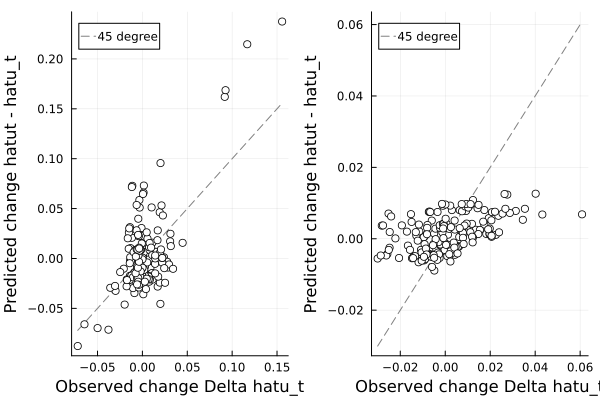

In [1053]:
UniversalDiffEq.plot_predictions(model)

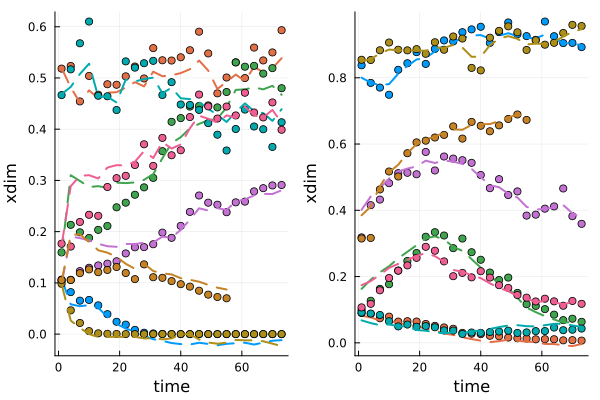

In [1054]:
UniversalDiffEq.plot_state_estiamtes(model)

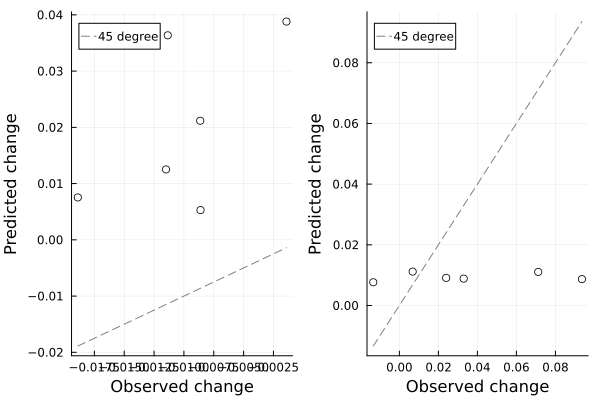

In [1055]:
UniversalDiffEq.plot_predictions(model, test_data)

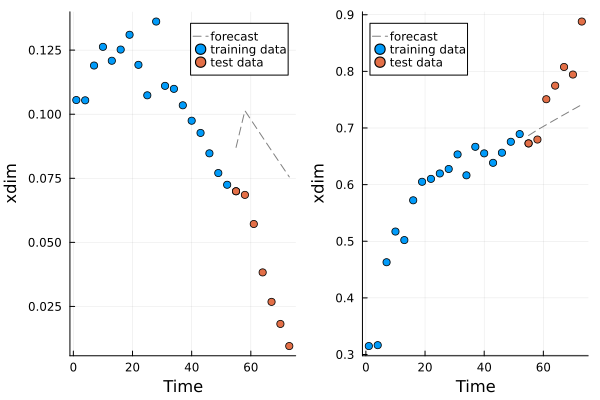

In [1056]:
UniversalDiffEq.plot_forecast(model, test_data)